In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
M = 100
np.random.seed(7777)

a = np.random.random()
b = np.random.random()

In [7]:
mu, sigma = 0, 1 # mean and standard deviation
noise = np.random.normal(mu, sigma, M)

In [8]:
x = np.arange(-5, 5, 0.1)

In [9]:
y = a * x + b + noise

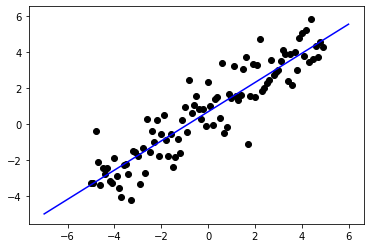

In [55]:
x_for_line = np.arange(-7, 7, 1)
y_for_line = x_for_line * a + b
plt.plot(x_for_line, y_for_line, color='blue')
plt.scatter(x, y, color='black')